In [1]:
import json
import pandas as pd
import numpy as np 
import requests
import seaborn as sns
from datetime import datetime
from requests.auth import HTTPDigestAuth
from matplotlib import pyplot as plt

/Users/marantz/.pyenv/versions/3.7.6/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# PUB_KEY="wmhpimjc"
# PRIVATE_KEY="00634500-6801-4399-8463-e94c09df6521"
# GROUP_ID="5cc99cd879358e1a071da4a5"\
# # curl -i -u "{PUBLIC-KEY}:{PRIVATE-KEY}"
# # --digest "https://cloud.mongodb.com/api/atlas/v1.0/groups/{GROUP-ID}/processes/
# # atlas-39m1v8-shard-00-01.pmezp.mongodb.net:27017
# # measurements?granularity=PT1M&period=2H&pretty=true"
# RESOURCE_ID="atlas-rvoilc-shard-00-02.pmezp.mongodb.net:27017"

# BASE_URL="https://cloud.mongodb.com/api/atlas/v1.0/groups/"
# REQUESTS_URL=BASE_URL + GROUP_ID + "/processes/"+ RESOURCE_ID +"/measurements?granularity=PT1M&period=PT1H"
# REQUESTS_URL

In [3]:
# response=requests.get(REQUESTS_URL, auth=HTTPDigestAuth(PUB_KEY, PRIVATE_KEY))

In [4]:
# response.status_code 

In [5]:
# response.text

In [6]:
#dict = json.load(json_file)
dict={}
#file_path='/Users/marantz/Desktop/WORKs/KBS/mediafactory/metrics/'
#file_name='status_mediafactory-prod-shard-00-00.edwaq.mongodb.net_27017_20211022160117.json'
#file_name='status_mediafactory-prod-shard-00-01.edwaq.mongodb.net_27017_20211022141724.json'
#file_name='status_mediafactory-prod-shard-00-03.edwaq.mongodb.net_27017_20211022160229.json'

# file_path='/Users/marantz/Desktop/WORKs/KBS/kanal/metrics/'
# file_name='status_kanal-prod-shard-00-01.ay12e.mongodb.net_27017_20211022002825.json'

#file_path='/Users/marantz/Sources/ZX_Temp/'
#file_name='status_mediafactory-prod-shard-00-01.edwaq.mongodb.net:27017_20211022141724.json'

#file_path='/Users/marantz/Desktop/WORKs/Dreamus/METRICS/mongodb_status_1025/'
#file_name='status_PT10S_PT24H_20211025145110.json'

# M60
file_path='/Users/marantz/Sources/ZX_Temp/script/'
file_name='status_fourshards-shard-00-01.pmezp.mongodb.net_20211029092305.json'

# M80
file_path='/Users/marantz/Sources/ZX_Temp/script/'
file_name='status_twoshards-shard-00-01.pmezp.mongodb.net_20211029092337.json'

full_path=file_path+file_name

with open(full_path) as json_file:
    dict = json.load(json_file)

In [7]:
results=dict['measurements']

In [8]:
#results

In [9]:
df=pd.DataFrame(results)
df

,dataPoints,name,units
0,"[{'timestamp': '2021-10-29T00:08:52Z', 'value'...",ASSERT_REGULAR,SCALAR_PER_SECOND
1,"[{'timestamp': '2021-10-29T00:08:52Z', 'value'...",ASSERT_WARNING,SCALAR_PER_SECOND
2,"[{'timestamp': '2021-10-29T00:08:52Z', 'value'...",ASSERT_MSG,SCALAR_PER_SECOND
3,"[{'timestamp': '2021-10-29T00:08:52Z', 'value'...",ASSERT_USER,SCALAR_PER_SECOND
4,"[{'timestamp': '2021-10-29T00:08:52Z', 'value'...",CACHE_BYTES_READ_INTO,BYTES_PER_SECOND
...,...,...,...
126,"[{'timestamp': '2021-10-29T00:05:45Z', 'value'...",MAX_SYSTEM_MEMORY_SHARED,KILOBYTES
127,"[{'timestamp': '2021-10-29T00:05:45Z', 'value'...",MAX_SYSTEM_MEMORY_CACHED,KILOBYTES
128,"[{'timestamp': '2021-10-29T00:05:45Z', 'value'...",MAX_SYSTEM_MEMORY_BUFFERS,KILOBYTES
129,"[{'timestamp': '2021-10-29T00:05:45Z', 'value'...",MAX_SWAP_USAGE_USED,KILOBYTES


In [10]:
names=df['name'].unique()
names

array(['ASSERT_REGULAR', 'ASSERT_WARNING', 'ASSERT_MSG', 'ASSERT_USER',
       'CACHE_BYTES_READ_INTO', 'CACHE_BYTES_WRITTEN_FROM',
       'CACHE_DIRTY_BYTES', 'CACHE_USED_BYTES', 'CONNECTIONS',
       'CURSORS_TOTAL_OPEN', 'CURSORS_TOTAL_TIMED_OUT',
       'DB_STORAGE_TOTAL', 'DB_DATA_SIZE_TOTAL',
       'DB_DATA_SIZE_TOTAL_WO_SYSTEM', 'DB_INDEX_SIZE_TOTAL',
       'DOCUMENT_METRICS_RETURNED', 'DOCUMENT_METRICS_INSERTED',
       'DOCUMENT_METRICS_UPDATED', 'DOCUMENT_METRICS_DELETED',
       'EXTRA_INFO_PAGE_FAULTS', 'GLOBAL_LOCK_CURRENT_QUEUE_TOTAL',
       'GLOBAL_LOCK_CURRENT_QUEUE_READERS',
       'GLOBAL_LOCK_CURRENT_QUEUE_WRITERS', 'MEMORY_RESIDENT',
       'MEMORY_VIRTUAL', 'MEMORY_MAPPED', 'NETWORK_BYTES_IN',
       'NETWORK_BYTES_OUT', 'NETWORK_NUM_REQUESTS', 'OPCOUNTER_CMD',
       'OPCOUNTER_QUERY', 'OPCOUNTER_UPDATE', 'OPCOUNTER_DELETE',
       'OPCOUNTER_GETMORE', 'OPCOUNTER_INSERT', 'OPCOUNTER_REPL_CMD',
       'OPCOUNTER_REPL_UPDATE', 'OPCOUNTER_REPL_DELETE',
       'OPC

In [11]:
units=df['units'].unique()
units

array(['SCALAR_PER_SECOND', 'BYTES_PER_SECOND', 'BYTES', 'SCALAR',
       'MEGABYTES', 'MILLISECONDS', 'SECONDS', 'GIGABYTES_PER_HOUR',
       'PERCENT', 'KILOBYTES'], dtype=object)

In [12]:
df.keys()

Index(['dataPoints', 'name', 'units'], dtype='object')

In [48]:
WORKLOAD_LISTS=[
#'OPCOUNTER_CMD','OPCOUNTER_QUERY','OPCOUNTER_UPDATE','OPCOUNTER_DELETE','OPCOUNTER_INSERT','OPCOUNTER_GETMORE',
#'CONNECTIONS',
#'OP_EXECUTION_TIME_READS', 'OP_EXECUTION_TIME_WRITES',
#'SYSTEM_NORMALIZED_CPU_USER','SYSTEM_NORMALIZED_CPU_KERNEL'
# 'MAX_SYSTEM_NORMALIZED_CPU_USER','MAX_SYSTEM_NORMALIZED_CPU_KERNEL'
 'NETWORK_BYTES_IN','NETWORK_BYTES_OUT',
# 'CACHE_USED_BYTES','SYSTEM_MEMORY_USED'
]

def getDataPoints(dataPoints):
    timestamps=[]
    values=[]
    for dataPoint in dataPoints:
        if dataPoint['value'] != None:
            timestamps.append(datetime.strptime(dataPoint['timestamp'], "%Y-%m-%dT%H:%M:%S%z"))
            values.append(dataPoint['value'])
            #values.append(dataPoint['value']/1024/1024)
    return values,timestamps

data_names=[]
data_timestamp=[]
data_values=[]
data_count=0

for result in results:
    #if 'CPU' in result['name'] :
    if result['name'] in WORKLOAD_LISTS :
        values,timestamps = getDataPoints(result['dataPoints'])
        data_names.append( result['name'] )
        #data_timestamp.append( timestamps )
        data_timestamp = timestamps
        data_values.append( values )
        data_count+=1

print('data_count  : ' + str(data_count))
metric_df=pd.DataFrame(list(map(list, zip(*data_values))),index=data_timestamp,columns=data_names)
metric_df.index.name = 'time'
metric_df

data_count  : 2


,NETWORK_BYTES_IN,NETWORK_BYTES_OUT
time,,
2021-10-29 00:09:09+00:00,5983.879635,68844.236969
2021-10-29 00:09:19+00:00,6618.900000,75664.100000
2021-10-29 00:09:29+00:00,3868.700000,64621.600000
2021-10-29 00:09:39+00:00,3897.500000,63341.600000
2021-10-29 00:09:49+00:00,6174.600000,76283.700000
...,...,...
2021-10-29 00:22:49+00:00,3671.300000,91376.000000
2021-10-29 00:22:59+00:00,6200.400000,114753.000000
2021-10-29 00:23:09+00:00,4075.100000,98136.500000


# Workload Basic Operations

<AxesSubplot:title={'center':'Workload Basic Operations'}, xlabel='time'>

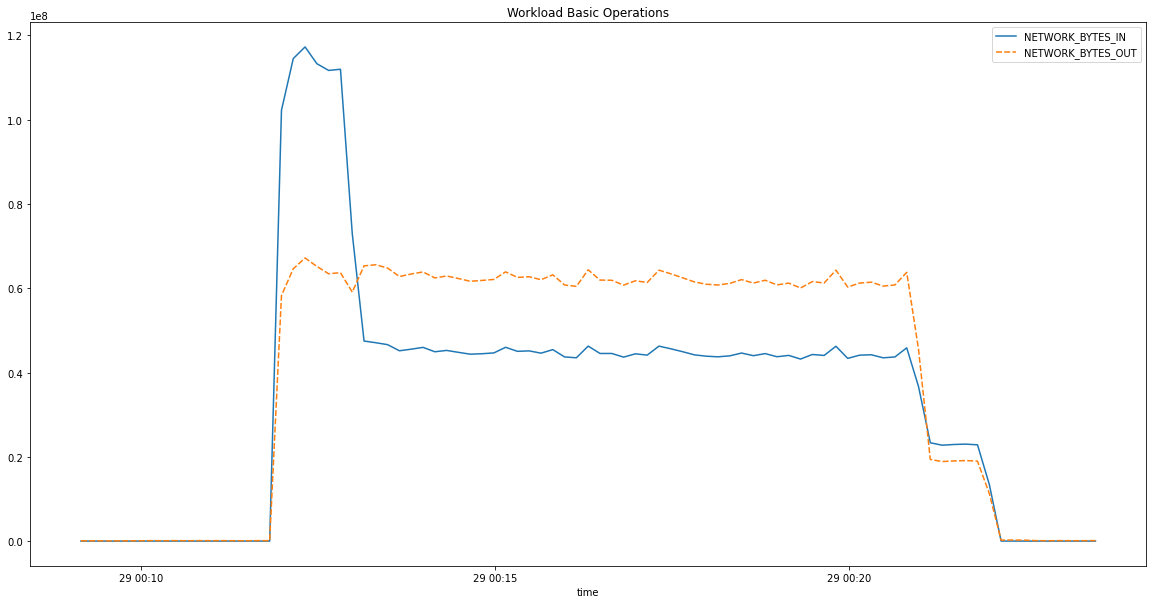

In [49]:
#metric_df.plot()
plt.figure(figsize=(20,10))
plt.title('Workload Basic Operations')
sns.lineplot(data=metric_df)

<AxesSubplot:title={'center':'Workload Basic Operations'}, xlabel='time'>

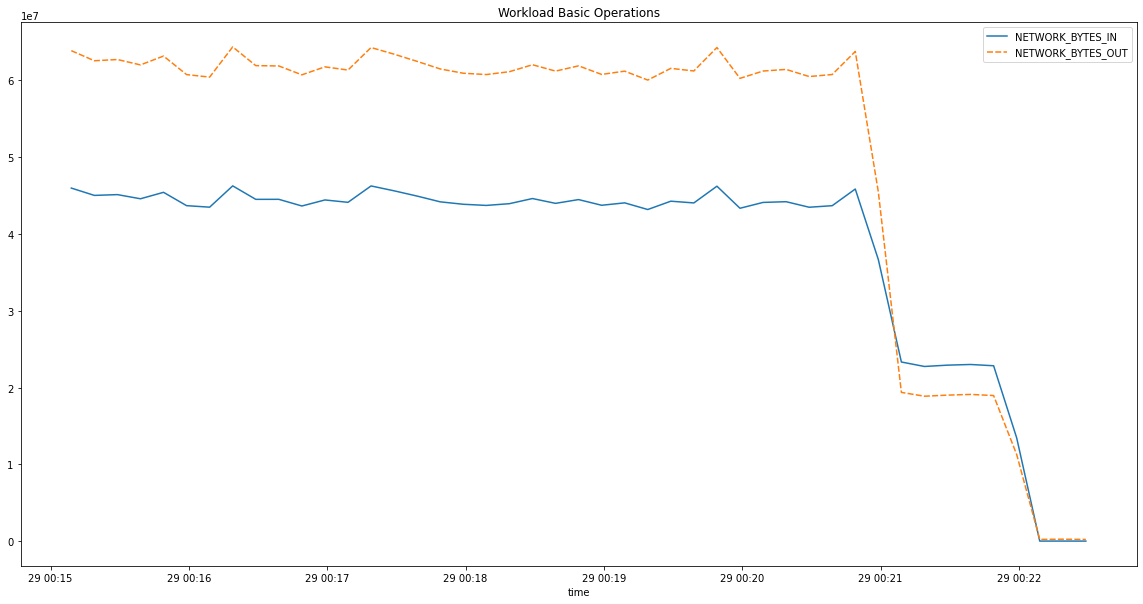

In [50]:
# 1
#start_time=pd.Timestamp("2021-10-25 02:55:00+00:00")
#end_time=pd.Timestamp("2021-10-25 03:05:00+00:00")
# 2
#start_time=pd.Timestamp("2021-10-25 03:15:40+00:00")
#end_time=pd.Timestamp("2021-10-25 03:39:00+00:00")

# M60
#start_time=pd.Timestamp("2021-10-26 08:47:00+00:00")
#end_time=pd.Timestamp("2021-10-26 09:00:00+00:00")
# Net
#start_time=pd.Timestamp("2021-10-26 08:41:30+00:00")
#end_time=pd.Timestamp("2021-10-26 08:54:30+00:00")

# M80
#start_time=pd.Timestamp("2021-10-26 07:40:30+00:00")
#end_time=pd.Timestamp("2021-10-26 07:53:00+00:00")

# 출근
#start_time=pd.Timestamp("2021-10-24 18:55:47+00:00")
#end_time=pd.Timestamp("2021-10-24 19:08:45+00:00")

# 점심
#start_time=pd.Timestamp("2021-10-25 02:55:00+00:00")
#end_time=pd.Timestamp("2021-10-25 03:05:00+00:00")

# 퇴근
#start_time=pd.Timestamp("2021-10-24 07:07:00+00:00")
#end_time=pd.Timestamp("2021-10-24 07:19:00+00:00")

start_time=pd.Timestamp("2021-10-29 00:15:00+00:00")
end_time=pd.Timestamp("2021-10-29 00:22:30+00:00")

#metric_df_new=metric_df.between_time('3:00','4:00',True,False,0)
metric_df_new=metric_df[(metric_df.index >= start_time) & (metric_df.index < end_time)]
#metric_df_new=metric_df
#metric_df_new.drop('dummy', inplace=True, axis=1)

plt.figure(figsize=(20,10))
plt.title('Workload Basic Operations')
sns.lineplot(data=metric_df_new)

In [51]:
#metric_df_new=metric_df
metric_df_new['dummy'] = 1
print_df=metric_df_new.groupby(lambda x: True).agg(['min','mean','max'])
print_df.drop('dummy', inplace=True, axis=1)
#print_df=print_df.transpose()
print_df

/Users/marantz/.pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


NETWORK_BYTES_IN                             NETWORK_BYTES_OUT  \
                  min          mean           max               min   
time                                                                  
True          10911.5  3.826386e+07  4.627088e+07          226349.4   

                                  
              mean           max  
time                              
True  5.149555e+07  6.436875e+07

In [52]:
with pd.ExcelWriter('measurements_workload.xlsx') as writer:
    print_df.to_excel(writer, sheet_name="workload")

In [18]:
metric_df.head(1).index

DatetimeIndex(['2021-10-29 00:09:09+00:00'], dtype='datetime64[ns, UTC]', name='time', freq=None)

In [19]:
metric_df.tail(1).index

DatetimeIndex(['2021-10-29 00:23:29+00:00'], dtype='datetime64[ns, UTC]', name='time', freq=None)

In [20]:
metric_df_new.head(1).index

DatetimeIndex(['2021-10-29 00:15:09+00:00'], dtype='datetime64[ns, UTC]', name='time', freq=None)

In [21]:
metric_df_new.tail(1).index

DatetimeIndex(['2021-10-29 00:22:29+00:00'], dtype='datetime64[ns, UTC]', name='time', freq=None)